<a href="https://colab.research.google.com/github/wenceslas12/Smap/blob/main/Smap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Propojení colab s google drive
from google.colab import drive
drive.mount('Smap')

Drive already mounted at Smap; to attempt to forcibly remount, call drive.mount("Smap", force_remount=True).


In [2]:
#Načtení datasetu
import pandas as pd

path='/content/Smap/MyDrive/Smap/files/SecondaryData/secondary_data_no_miss.csv'

df=pd.read_csv(path,sep=";")

In [3]:
#Zoprazení prvních 5 řádků
pd.set_option('display.max_columns', None)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a


In [4]:
#Zoprazení počtu řádku
print(df.shape)

(61069, 16)


In [5]:
#Zobrazení jednotlivých typu vlastností v datasetu
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object

In [6]:
#Statistické ůdaje a vlastnostech typu float
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.746893,6.588775,12.155013
std,5.262972,3.362591,9.989620
min,0.410000,0.000000,0.000000
25%,3.490000,4.640000,5.200000
50%,5.890000,5.960000,10.180000
75%,8.540000,7.760000,16.600000
max,61.580000,35.790000,100.830000


In [7]:
#Odstranění duplicitních řádků
df = df.drop_duplicates()
print(df.shape)

(60924, 16)


In [8]:
#Test chybějících hodnot
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [9]:
#Názvy sloupců
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

In [10]:
#Převedení nečíselných hodnot na číselné
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
        'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']
for column in columns:
    encoded_values = le.fit_transform(df[column])
    df[column] = encoded_values

df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,1.26,6,2,11,0,1,0,10,5.04,1.73,12,0,1,0,0
1,0,10.32,2,1,0,0,0,0,0,4.68,19.44,11,1,1,0,0
2,1,0.92,6,2,7,0,0,0,7,4.59,1.15,4,0,1,0,2
3,1,4.27,6,8,7,0,6,0,10,4.55,6.52,11,0,1,0,0
4,0,3.08,2,7,10,0,1,1,10,2.67,5.18,11,0,1,4,0


In [11]:
#rozdělení datasetu
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
#Normalizace hodnot
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#Vytvoření modelu neuronové sítě
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =15))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
#Natrénování modelu
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
1428/1428 [==============================] - 12s 7ms/step - loss: 0.1869 - accuracy: 0.9184 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoch 2/100
1428/1428 [==============================] - 7s 5ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0230 - val_accuracy: 0.9918
Epoch 3/100
1428/1428 [==============================] - 10s 7ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0133 - val_accuracy: 0.9955
Epoch 4/100
1428/1428 [==============================] - 3s 2ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0147 - val_accuracy: 0.9949
Epoch 5/100
1428/1428 [==============================] - 3s 2ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0066 - val_accuracy: 0.9980
Epoch 6/100
1428/1428 [==============================] - 4s 3ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0056 - val_accuracy: 0.9985
Epoch 7/100
1428/1428 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0049 - val_

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
target_names = ["Edible", "Possinus"]


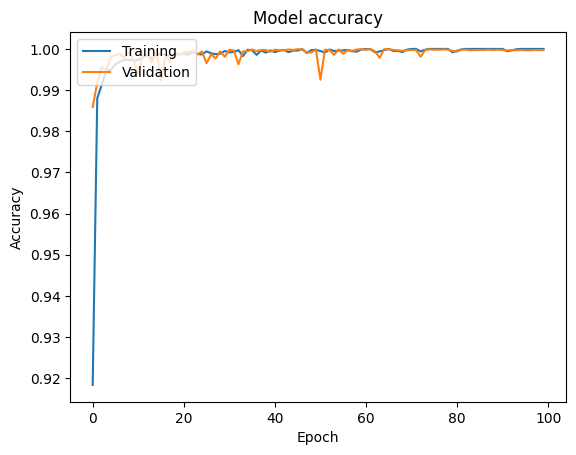

In [16]:
# Graf pro přesnost
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

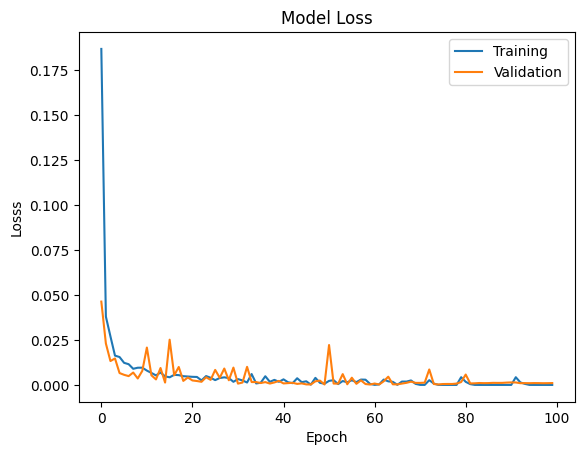

In [17]:
# Graf pro ztrátu
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Losss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [18]:
y_pred = model.predict(X_test)

476/476 [==============================] - 1s 1ms/step


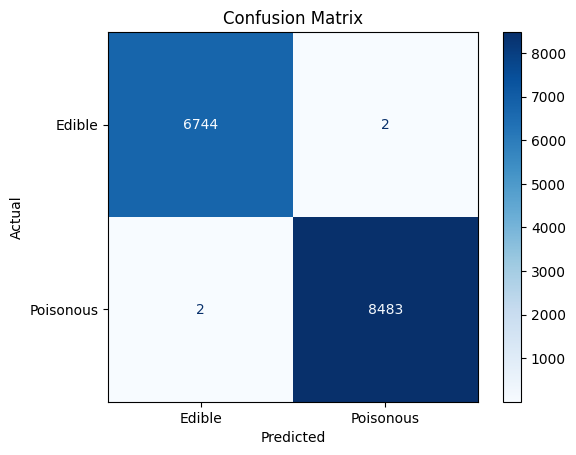

In [19]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Převést pravděpodobnosti na třídy (za předpokladu binární klasifikace)
y_pred_classes = (y_pred > 0.5).astype("int32")

#Vytvoření confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Zobrazení confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot(cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      6746
    Possinus       1.00      1.00      1.00      8485

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

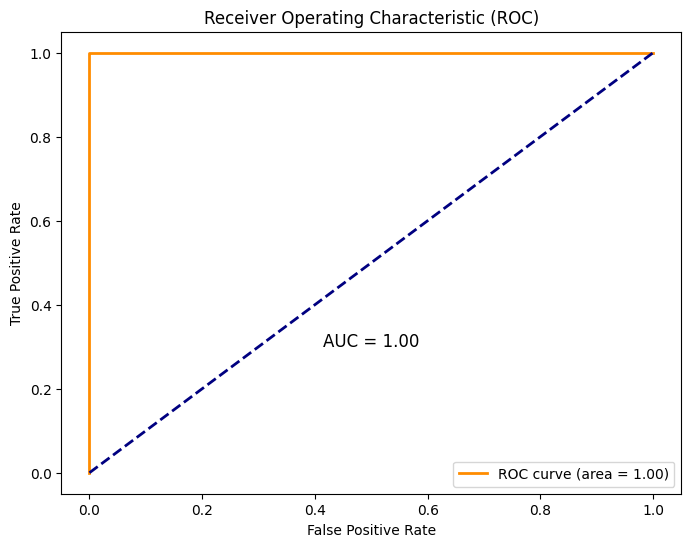

In [22]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.text(0.5, 0.3, 'AUC = %0.2f' % roc_auc, ha='center', fontsize=12)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, mean_absolute_error, mean_squared_error, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred_classes)
log_loss_value = log_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

# Výpis metrik
print(f"Classification Accuracy: {accuracy}")
print(f"Logarithmic Loss: {log_loss_value}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Classification Accuracy: 0.9997373777164993
Logarithmic Loss: 0.001034990854081169
F1 Score: 0.9997642899233943
Precision: 0.9997642899233943
Recall: 0.9997642899233943
